In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import iqr

In [24]:
df = pd.read_csv('sha256_benchmarks.csv')

In [25]:
df = df[df['Iteração'] > 10]

In [26]:
print(df.columns)

Index(['Tipo de Encriptação', 'Tamanho do Arquivo (bytes)', 'Iteração',
       'Tempo de Encriptação (μs)'],
      dtype='object')


In [27]:
# Remove linhas com valores nulos nas colunas necessárias
df = df.dropna(subset=['Tamanho do Arquivo (bytes)', 'Tempo de Encriptação (μs)'])



In [28]:

# Função para remover outliers usando o método IQR
def remove_outliers(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr_value = q3 - q1
    lower = q1 - 1.5 * iqr_value
    upper = q3 + 1.5 * iqr_value
    return data[(data >= lower) & (data <= upper)]

In [29]:
sns.set(style='whitegrid')

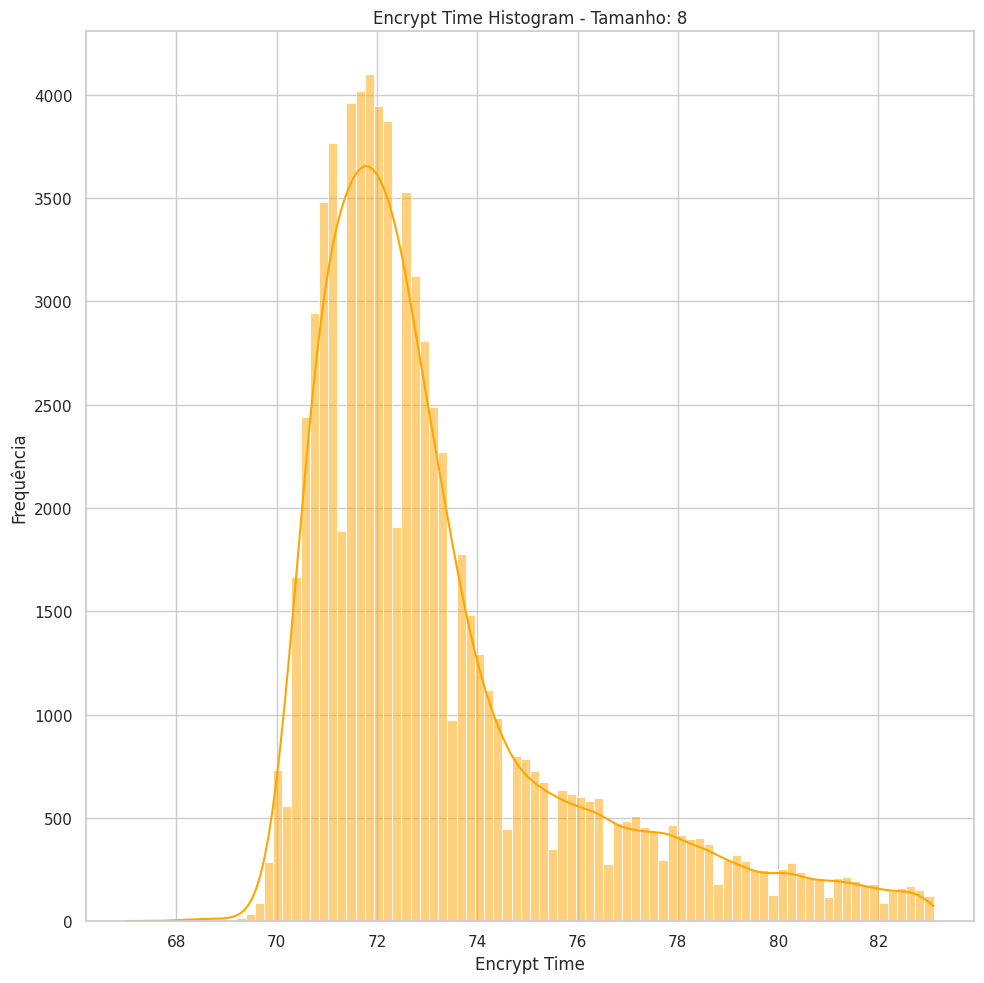

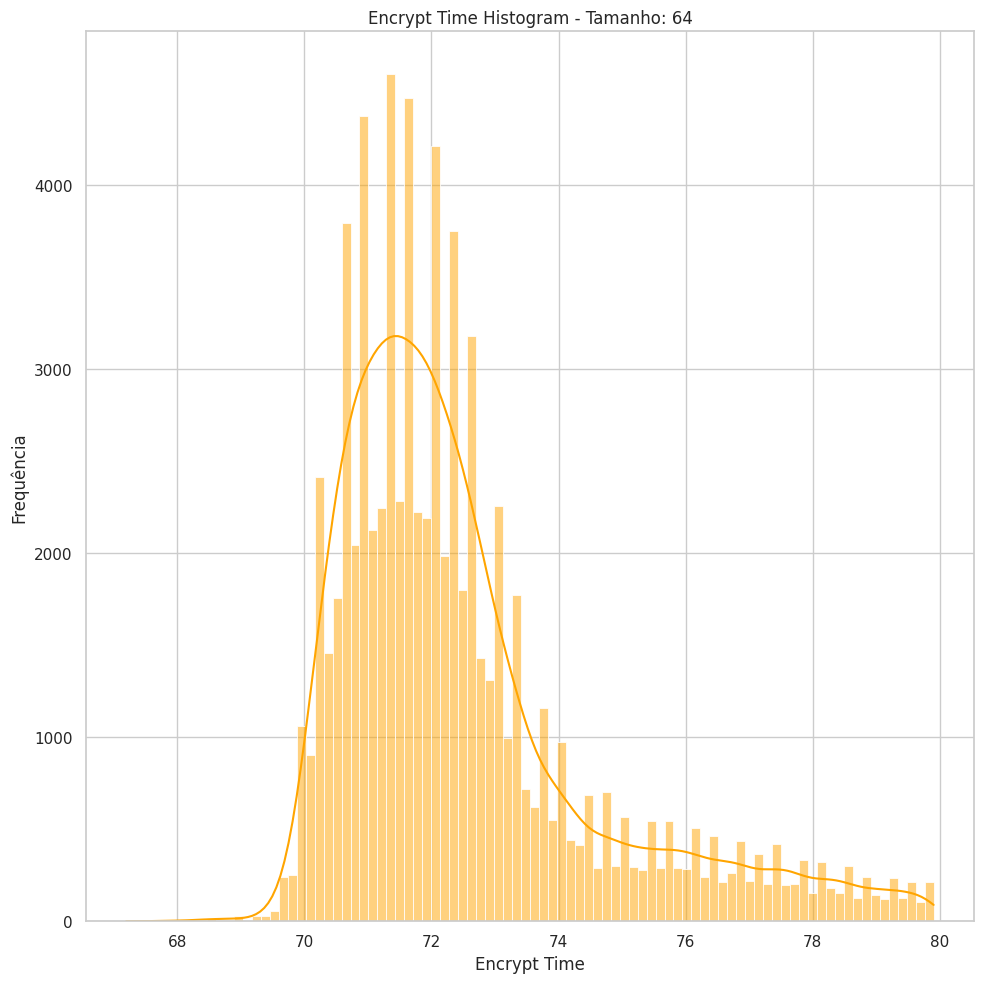

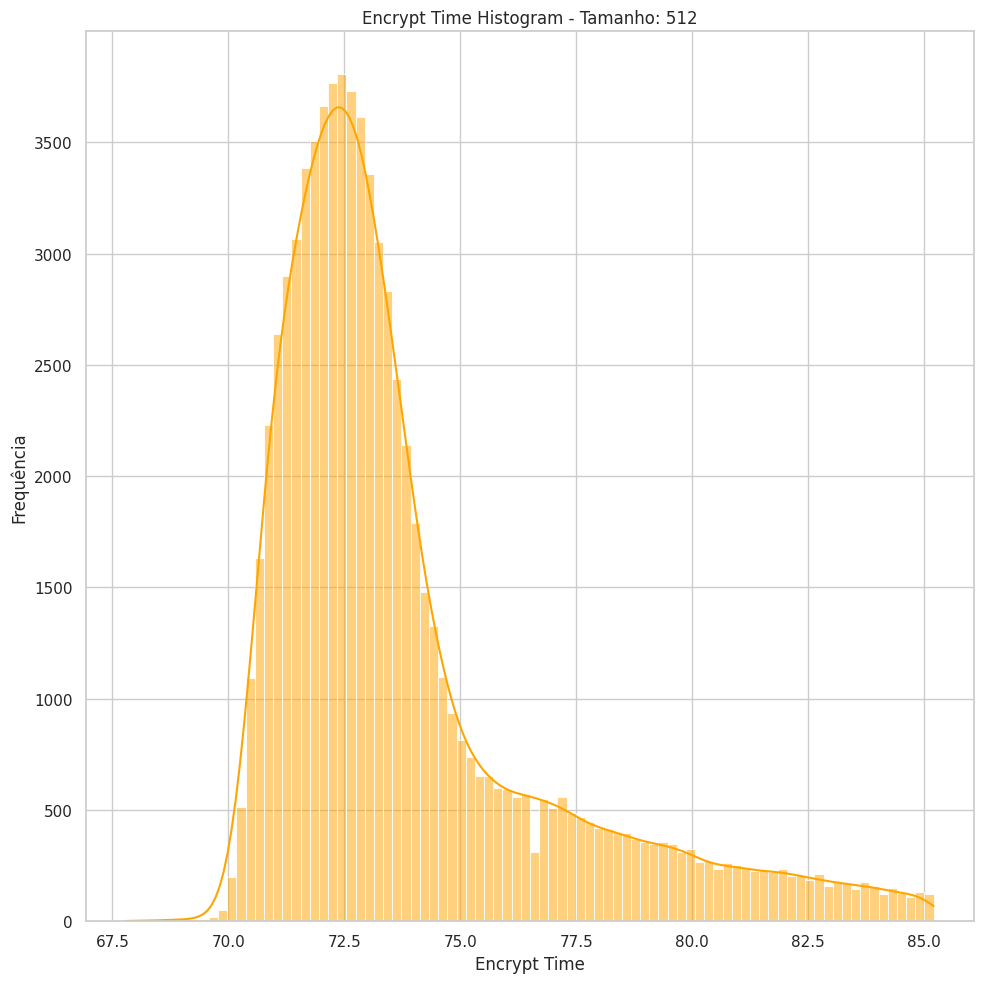

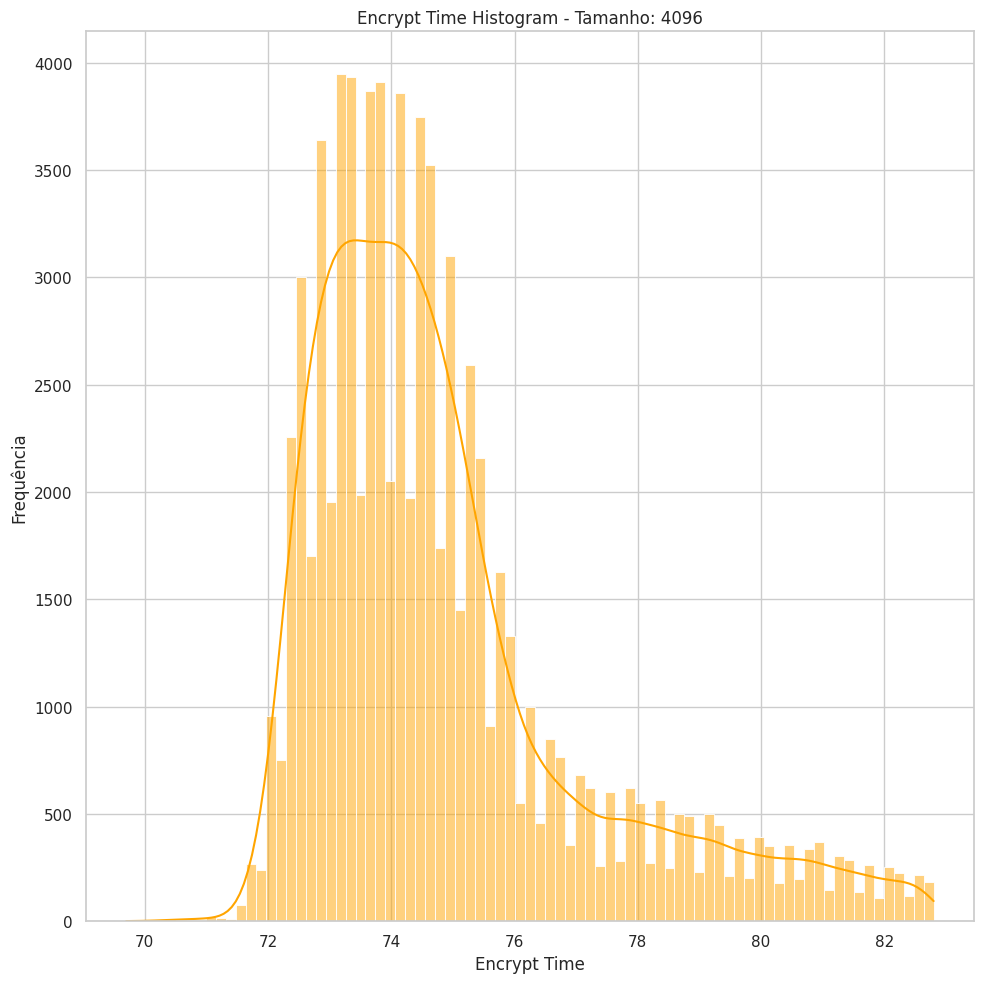

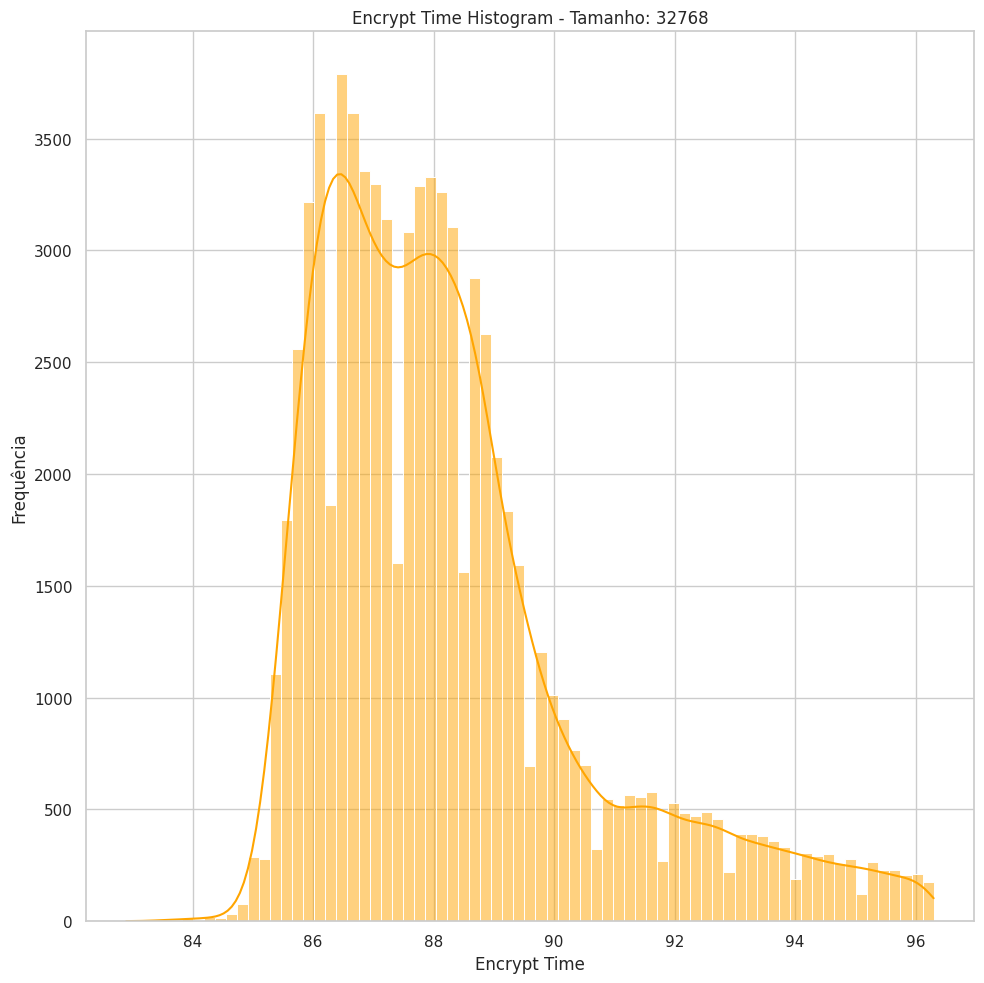

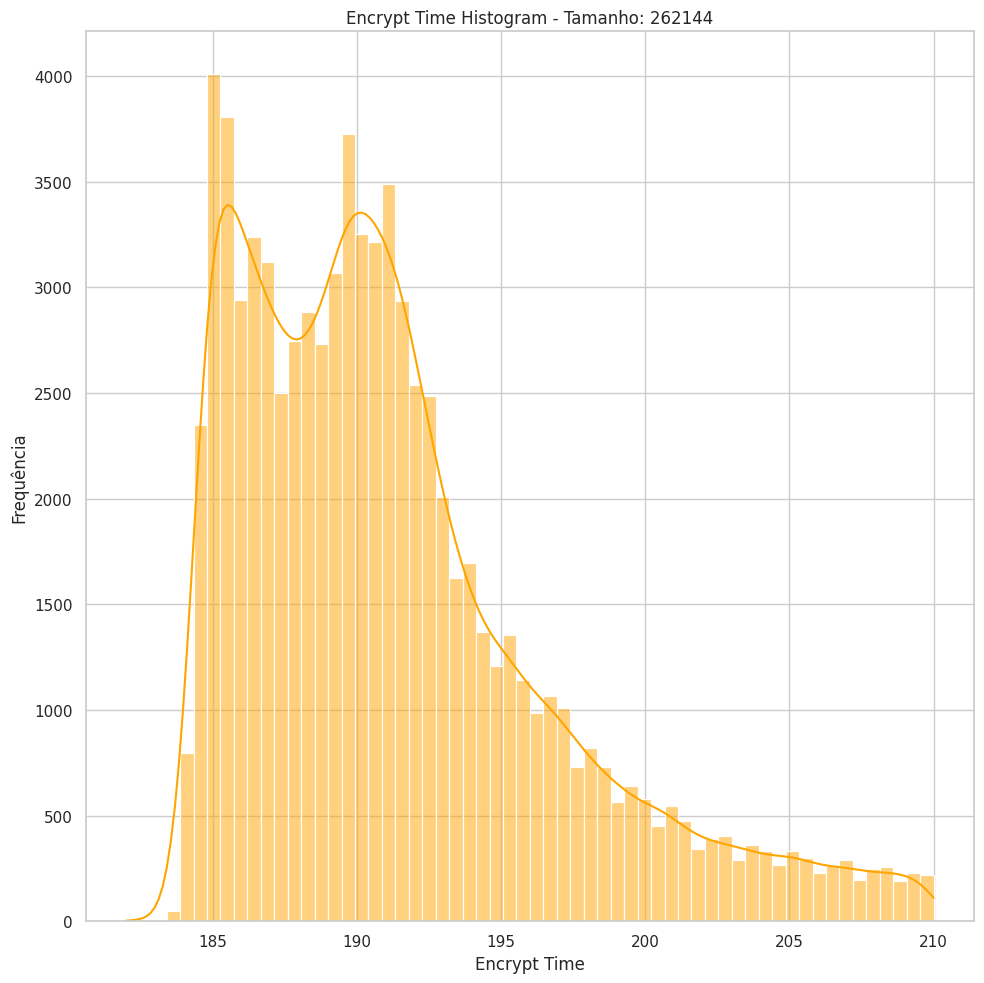

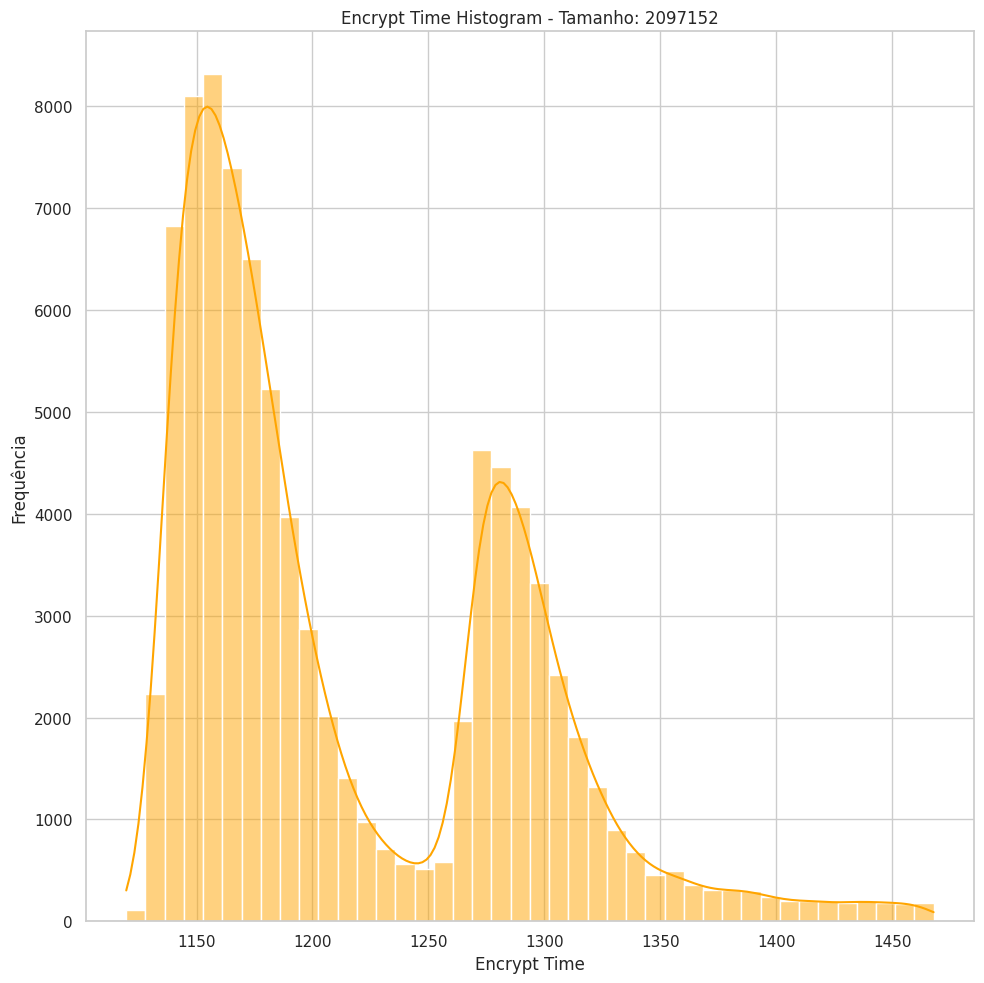

In [30]:
# Por tamanho do ficheiro faz um histograma do tempo de encriptação
for tamanho_valor in df['Tamanho do Arquivo (bytes)'].unique():
    subset = df[df['Tamanho do Arquivo (bytes)'] == tamanho_valor]['Tempo de Encriptação (μs)']
    subset_clean = remove_outliers(subset)


    # Escolher o número ideal de bins com base na regra de Freedman-Diaconis
    bin_width = 2 * iqr(subset_clean) / (len(subset_clean) ** (1/3))
    bin_width *= 1.5  # Aumenta a largura dos bins em 50%
    if bin_width == 0:
        continue  # Evita erro se IQR for 0
    bins = int((subset_clean.max() - subset_clean.min()) / bin_width)

    # Plot do histograma
    plt.figure(figsize=(10,10))
    sns.histplot(subset_clean, bins=bins, kde=True, color='orange')
    plt.title(f'Encrypt Time Histogram - Tamanho: {tamanho_valor}')
    plt.xlabel('Encrypt Time')
    plt.ylabel('Frequência')
    plt.tight_layout()
    plt.show()

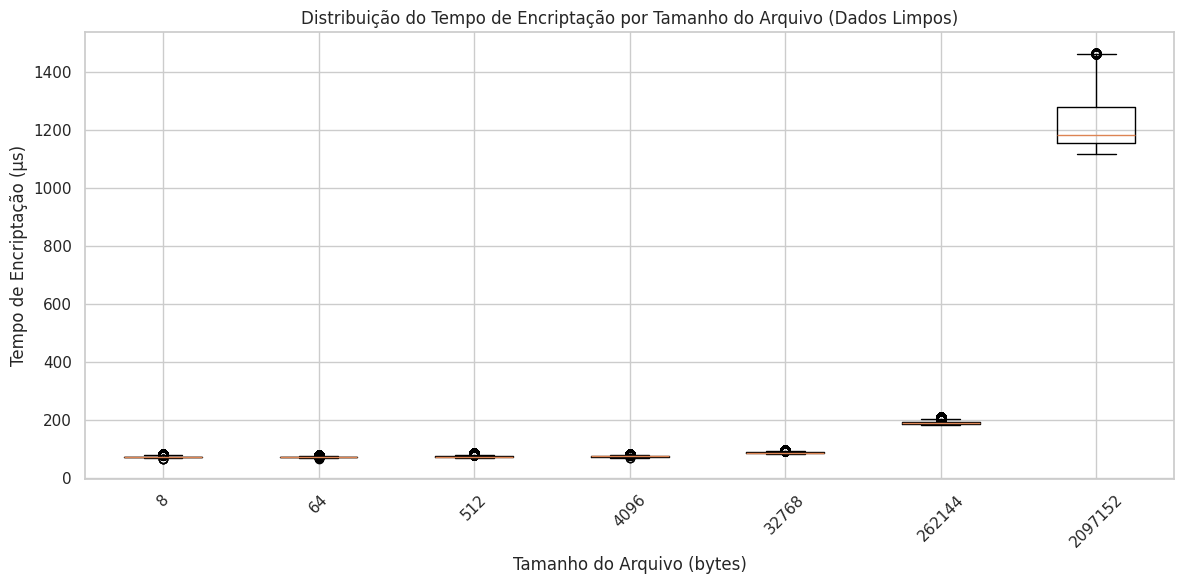

In [31]:
cleaned_data = []

for tamanho_valor in df['Tamanho do Arquivo (bytes)'].unique():
    subset = df[df['Tamanho do Arquivo (bytes)'] == tamanho_valor]['Tempo de Encriptação (μs)']
    subset_clean = remove_outliers(subset)
    cleaned_data.append((tamanho_valor, subset_clean))

plt.figure(figsize=(12, 6))
plt.boxplot([data[1] for data in cleaned_data], labels=[data[0] for data in cleaned_data])
plt.title('Distribuição do Tempo de Encriptação por Tamanho do Arquivo (Dados Limpos)')
plt.xlabel('Tamanho do Arquivo (bytes)')
plt.ylabel('Tempo de Encriptação (μs)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

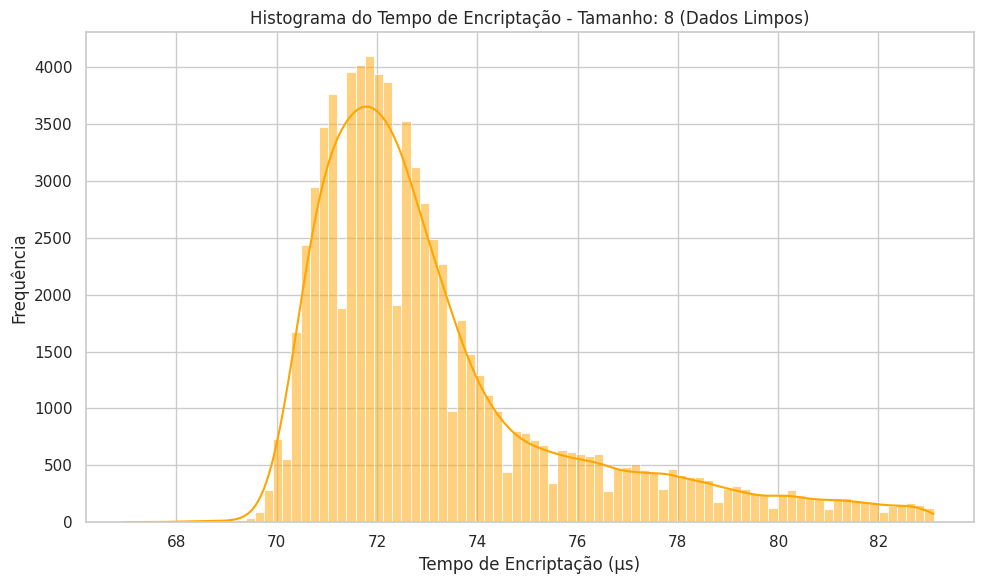

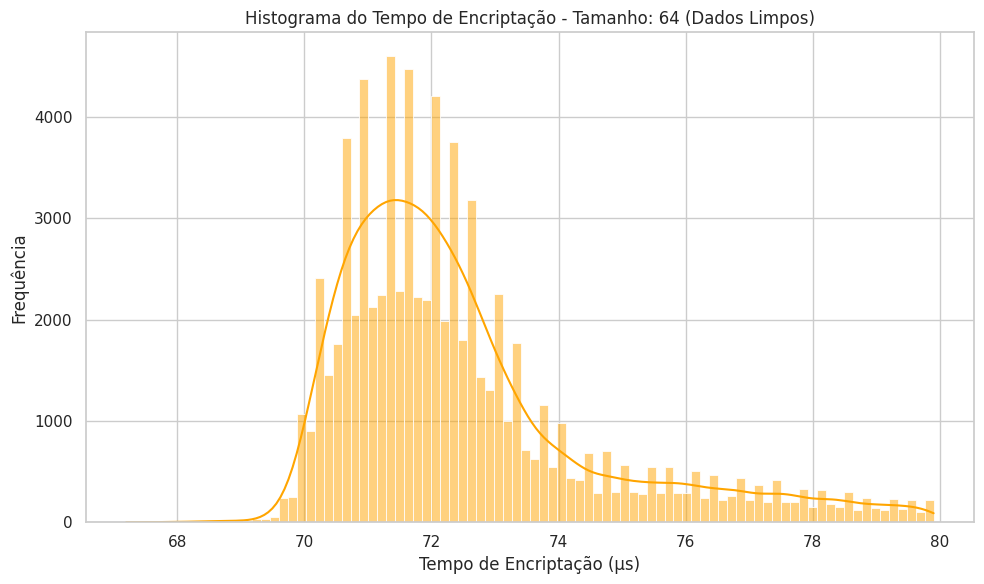

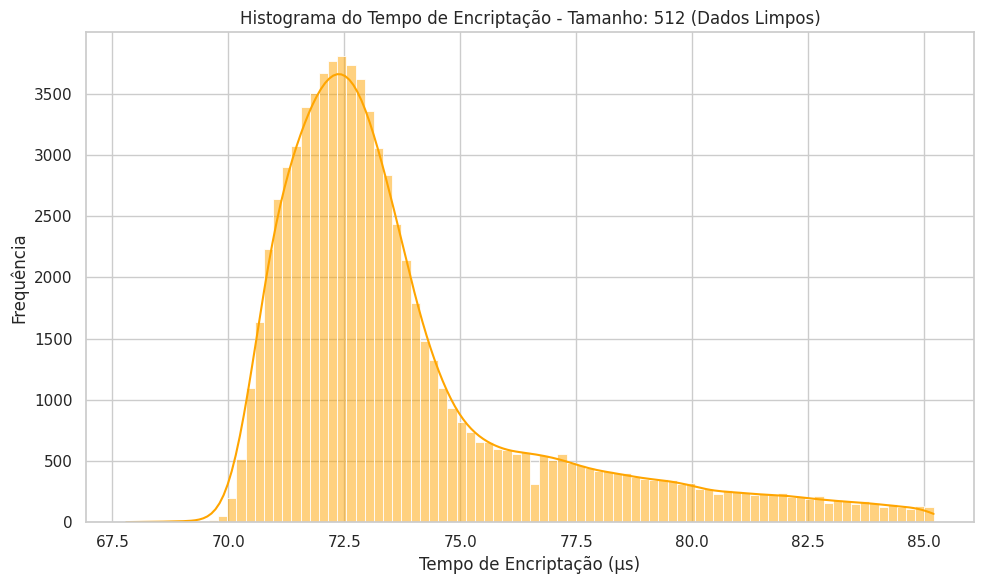

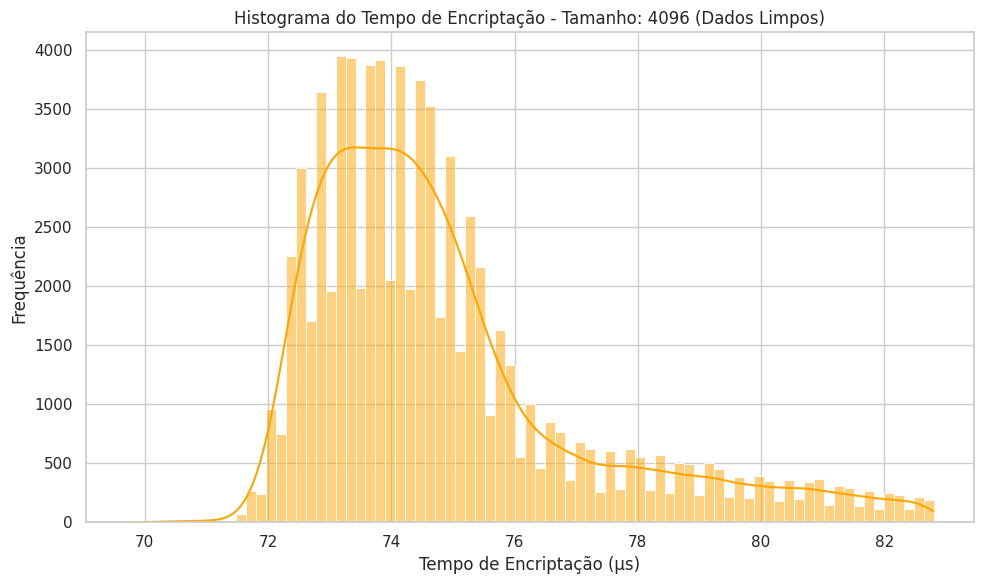

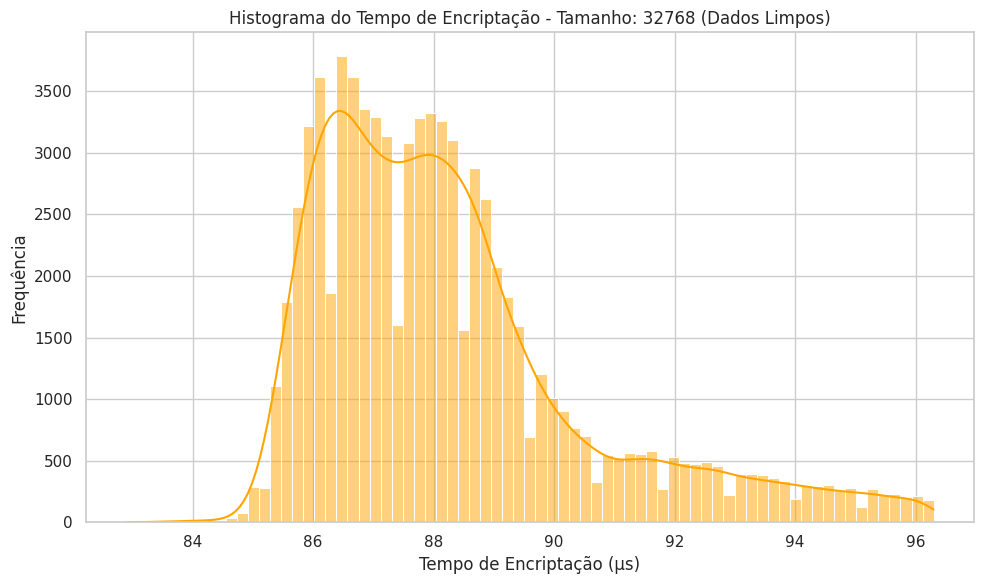

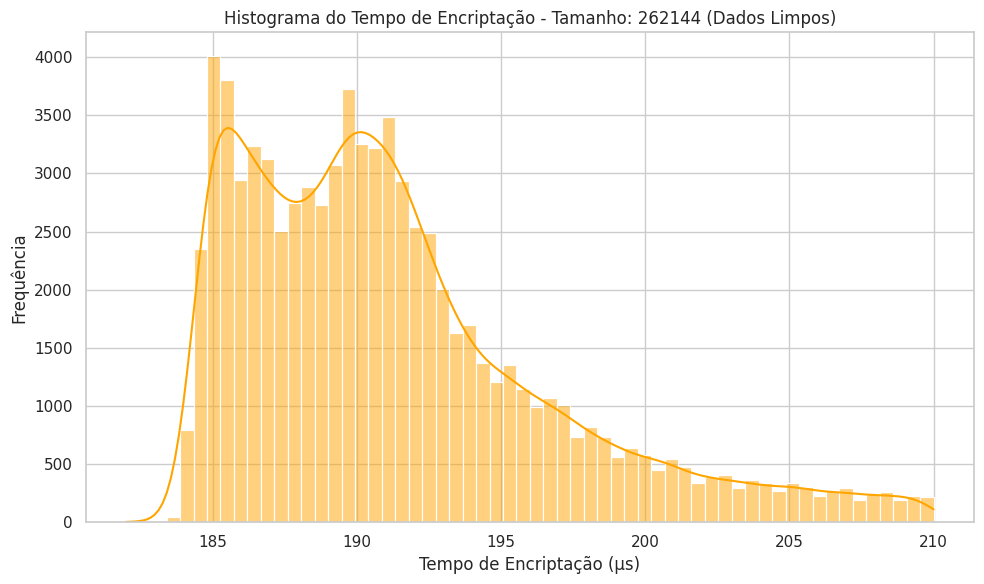

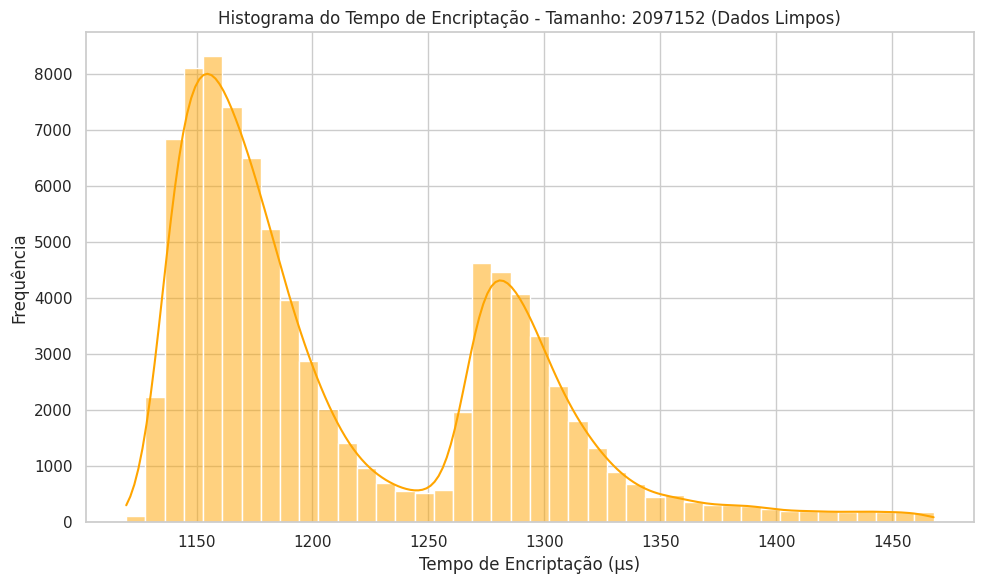

In [32]:
for tamanho_valor in df['Tamanho do Arquivo (bytes)'].unique():
    subset = df[df['Tamanho do Arquivo (bytes)'] == tamanho_valor]['Tempo de Encriptação (μs)']
    subset_clean = remove_outliers(subset)

    # Escolher o número ideal de bins com base na regra de Freedman-Diaconis
    bin_width = 2 * iqr(subset_clean) / (len(subset_clean) ** (1/3))
    bin_width *= 1.5  # Aumenta a largura dos bins em 50%
    if bin_width == 0:
        continue  # Evita erro se IQR for 0
    bins = int((subset_clean.max() - subset_clean.min()) / bin_width)

    # Plot do histograma
    plt.figure(figsize=(10, 6))
    sns.histplot(subset_clean, bins=bins, kde=True, color='orange')
    plt.title(f'Histograma do Tempo de Encriptação - Tamanho: {tamanho_valor} (Dados Limpos)')
    plt.xlabel('Tempo de Encriptação (μs)')
    plt.ylabel('Frequência')
    plt.tight_layout()
    plt.show()

/tmp/ipykernel_42915/3965817693.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tamanhos, y=medias_medianas, palette='coolwarm')


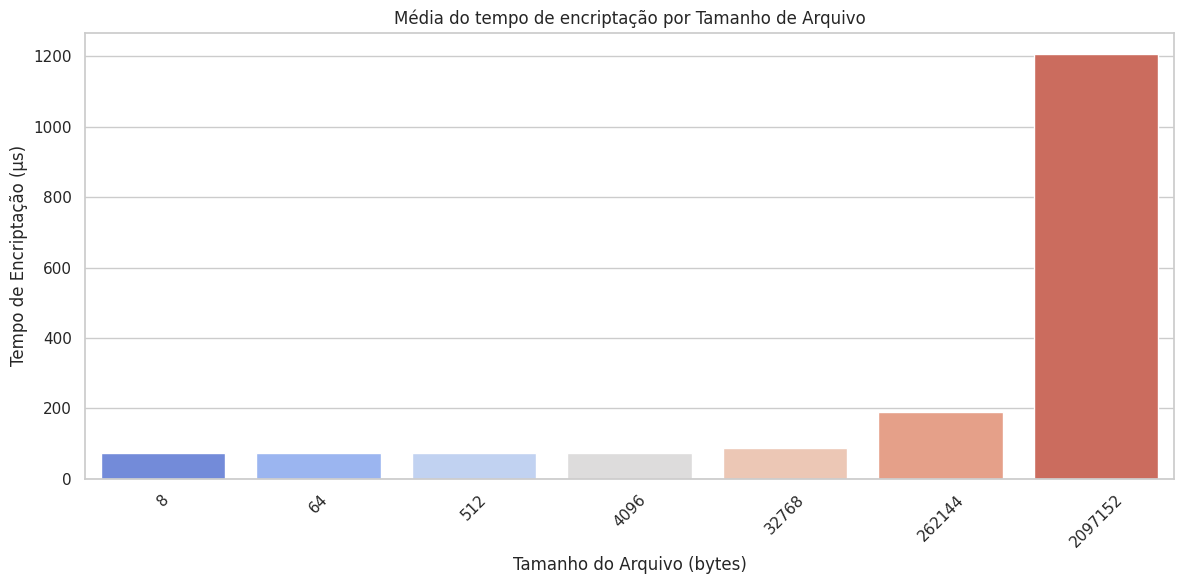

In [33]:

# Criar uma lista para armazenar a média das medianas por tamanho de arquivo
media_das_medianas_por_tamanho = []

# Iterar sobre cada tamanho de arquivo único
for tamanho_valor in df['Tamanho do Arquivo (bytes)'].unique():
    # Filtrar os dados para o tamanho atual
    subset = df[df['Tamanho do Arquivo (bytes)'] == tamanho_valor]
    
    # Criar uma lista para armazenar as medianas de cada bloco de 90 iterações
    medianas_por_arquivo = []
    
    # Iterar sobre cada algoritmo no subset
    for algoritmo in subset['Tipo de Encriptação'].unique():
        # Filtrar os dados para o algoritmo atual
        algoritmo_subset = subset[subset['Tipo de Encriptação'] == algoritmo]['Tempo de Encriptação (μs)']
        
        # Dividir os dados em blocos de 90 iterações
        for i in range(0, len(algoritmo_subset), 90):
            bloco = algoritmo_subset.iloc[i:i + 90]
            if len(bloco) == 90:  # Garantir que o bloco tenha exatamente 90 iterações
                medianas_por_arquivo.append(bloco.median())
    
    # Calcular a média das medianas para o tamanho atual
    if medianas_por_arquivo:  # Garantir que existam medianas calculadas
        media_das_medianas = np.mean(medianas_por_arquivo)
        media_das_medianas_por_tamanho.append((tamanho_valor, media_das_medianas))

# Ordenar os resultados por tamanho de arquivo
media_das_medianas_por_tamanho = sorted(media_das_medianas_por_tamanho, key=lambda x: x[0])

# Separar os tamanhos e as médias das medianas para plotagem
tamanhos = [data[0] for data in media_das_medianas_por_tamanho]
medias_medianas = [data[1] for data in media_das_medianas_por_tamanho]

# Criar o gráfico
plt.figure(figsize=(12, 6))
sns.barplot(x=tamanhos, y=medias_medianas, palette='coolwarm')
plt.title('Média do tempo de encriptação por Tamanho de Arquivo')
plt.xlabel('Tamanho do Arquivo (bytes)')
plt.ylabel('Tempo de Encriptação (μs)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

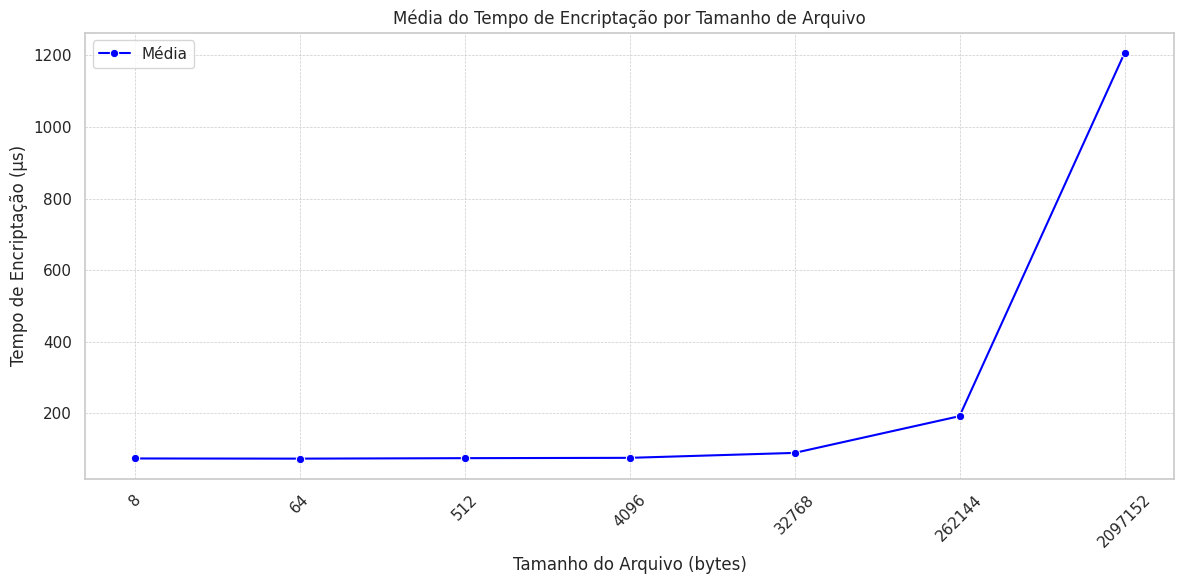

In [34]:
# Criar o gráfico de função
plt.figure(figsize=(12, 6))
sns.lineplot(x=tamanhos, y=medias_medianas, marker='o', color='blue', label='Média')

# Configurações do gráfico
plt.title('Média do Tempo de Encriptação por Tamanho de Arquivo')
plt.xlabel('Tamanho do Arquivo (bytes)')
plt.ylabel('Tempo de Encriptação (μs)')

# Definir escala logarítmica no eixo x
plt.xscale('log')
plt.xticks([8, 64, 512, 4096, 32768, 262144, 2097152], labels=[8, 64, 512, 4096, 32768, 262144, 2097152], rotation=45)

# Adicionar grade
plt.grid(True, linestyle='--', linewidth=0.5)

# Adicionar legenda
plt.legend()

# Ajustar layout
plt.tight_layout()
plt.show()

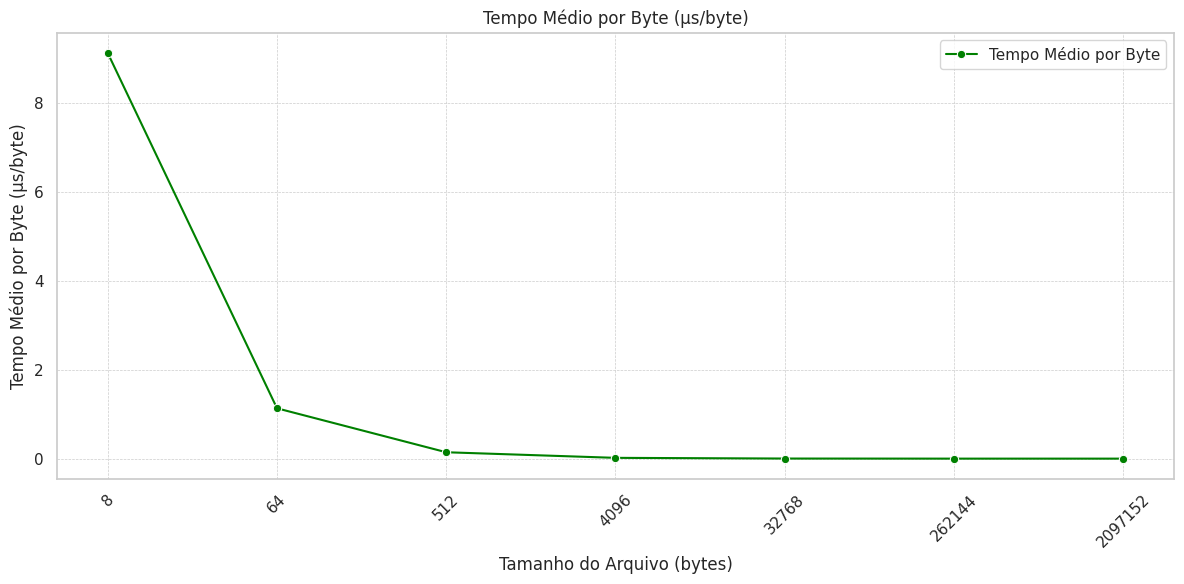

In [35]:
# Calcular a eficiência (tempo médio por byte)
eficiencia = [media / tamanho for media, tamanho in zip(medias_medianas, tamanhos)]

# Criar o gráfico de função
plt.figure(figsize=(12, 6))
sns.lineplot(x=tamanhos, y=eficiencia, marker='o', color='green', label='Tempo Médio por Byte')

# Configurações do gráfico
plt.title('Tempo Médio por Byte (μs/byte)')
plt.xlabel('Tamanho do Arquivo (bytes)')
plt.ylabel('Tempo Médio por Byte (μs/byte)')

# Definir escala logarítmica no eixo x
plt.xscale('log')
plt.xticks([8, 64, 512, 4096, 32768, 262144, 2097152], labels=[8, 64, 512, 4096, 32768, 262144, 2097152], rotation=45)

# Adicionar grade
plt.grid(True, linestyle='--', linewidth=0.5)

# Adicionar legenda
plt.legend()

# Ajustar layout
plt.tight_layout()
plt.show()

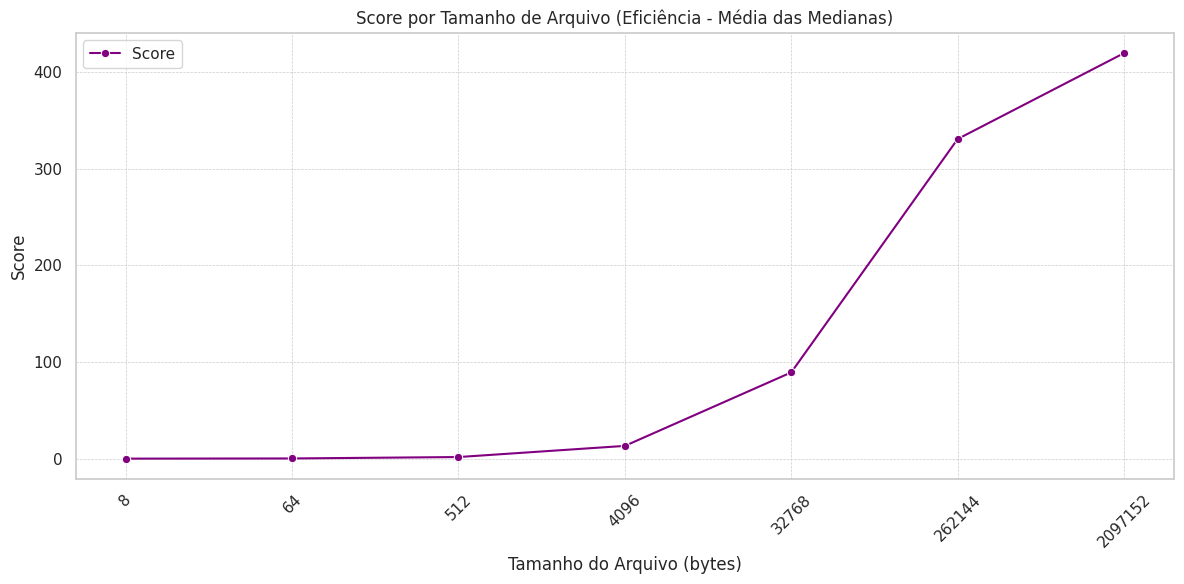

In [39]:
# Calcular o tempo médio por byte usando a média das medianas
mean_time_per_byte = [media / tamanho for media, tamanho in zip(medias_medianas, tamanhos)]

# Calcular o desvio padrão do tempo médio por byte (encriptação)
std_encryption = np.std(mean_time_per_byte)

# Calcular o score diretamente para cada tamanho de arquivo usando a média das medianas
score = []
for media, tamanho in zip(medias_medianas, tamanhos):
    mean_time_per_byte = media / tamanho  # Usar a média das medianas
    score_value = 1 / (mean_time_per_byte * (1 + std_encryption))
    score.append(score_value)

# Criar o gráfico de função
plt.figure(figsize=(12, 6))
sns.lineplot(x=tamanhos, y=score, marker='o', color='purple', label='Score')

# Configurações do gráfico
plt.title('Score por Tamanho de Arquivo (Eficiência - Média das Medianas)')
plt.xlabel('Tamanho do Arquivo (bytes)')
plt.ylabel('Score')

# Definir escala logarítmica no eixo x
plt.xscale('log')
plt.xticks([8, 64, 512, 4096, 32768, 262144, 2097152], labels=[8, 64, 512, 4096, 32768, 262144, 2097152], rotation=45)

# Adicionar grade
plt.grid(True, linestyle='--', linewidth=0.5)

# Adicionar legenda
plt.legend()

# Ajustar layout
plt.tight_layout()
plt.show()